In [63]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
############# 보스턴 주택가격 데이터 변수설명
#[01]  CRIM: 자치시(town) 별 1인당 범죄율  
#[02]  ZN: 25,000 평방피트를 초과하는 거주지역의 비율  
#[03]  INDUS: 비소매상업지역이 점유하고 있는 토지의 비율  
#[04]  CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
#[05]  NOX: 10ppm 당 농축 일산화질소  
#[06]  RM: 주택 1가구당 평균 방의 개수  
#[07]  AGE: 1940년 이전에 건축된 소유주택의 비율  
#[08]  DIS: 5개의 보스턴 직업센터까지의 접근성 지수
#[09]  RAD: 방사형 도로까지의 접근성 지수  
#[10]  TAX: 10,000 달러 당 재산세율  
#[11]  PTRATIO: 자치시(town)별 학생/교사 비율  
#[12]  B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
#[13]  LSTAT: 모집단의 하위계층의 비율(%)  [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)


In [64]:
############# 데이터 불러오기
dat_dir = 'C:/Users/user/Desktop/AI_Project/[classification]loan_use/'
dat = pd.read_csv(dat_dir+'loan_data.csv')
dat.head(10)
#display(HTML(dat.to_html()))
#dat = dat.drop('ID', axis = 1)
#display(HTML(dat.to_html()))

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
5,45,141,18,105,33,7,0,0,0,11,...,1.52,80,800,0,0,1,M,B,B,0
6,45,348,0,0,0,3,0,7900,0,3,...,0.69,120,900,1,0,0,F,C,C,0
7,35,123,123,0,0,3,0,3900,0,0,...,3.26,80,900,0,0,1,F,C,C,0
8,40,201,24,201,0,4,0,0,0,11,...,1.57,60,500,0,0,1,F,C,B,0
9,35,75,75,75,0,2,0,4400,0,6,...,7.94,100,0,0,0,1,F,B,B,0


In [65]:
############# 데이터 살펴보기
# Data format
print("number of observation in data : {}".format(dat.shape[0]))
print("number of Variables in Data  : {}".format(dat.shape[1]))
dat.head(10)

number of observation in data : 43386
number of Variables in Data  : 23


,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
5,45,141,18,105,33,7,0,0,0,11,...,1.52,80,800,0,0,1,M,B,B,0
6,45,348,0,0,0,3,0,7900,0,3,...,0.69,120,900,1,0,0,F,C,C,0
7,35,123,123,0,0,3,0,3900,0,0,...,3.26,80,900,0,0,1,F,C,C,0
8,40,201,24,201,0,4,0,0,0,11,...,1.57,60,500,0,0,1,F,C,B,0
9,35,75,75,75,0,2,0,4400,0,6,...,7.94,100,0,0,0,1,F,B,B,0


In [66]:
############# 데이터 전처리
# split x variable to y variable
x,y = dat.drop('TARGET', axis=1), dat['TARGET']

In [67]:
x

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB
0,40,6,6,6,0,0,0,4500,0,16,...,0,1.52,120,500,0,120,0,M,A,A
1,35,9,9,0,0,1,0,3700,0,9,...,0,2.14,100,800,0,0,0,M,C,B
2,55,9,9,0,0,0,0,6400,0,1,...,0,0.50,50,700,0,0,0,M,C,B
3,55,42,0,42,0,5,0,8900,0,13,...,0,2.61,80,900,0,0,0,M,B,C
4,40,36,36,36,0,3,1,0,0,2,...,0,2.11,10,900,0,0,1,F,B,B
5,45,141,18,105,33,7,0,0,0,11,...,0,1.52,80,800,0,0,1,M,B,B
6,45,348,0,0,0,3,0,7900,0,3,...,0,0.69,120,900,1,0,0,F,C,C
7,35,123,123,0,0,3,0,3900,0,0,...,0,3.26,80,900,0,0,1,F,C,C
8,40,201,24,201,0,4,0,0,0,11,...,0,1.57,60,500,0,0,1,F,C,B
9,35,75,75,75,0,2,0,4400,0,6,...,0,7.94,100,0,0,0,1,F,B,B


In [68]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
43356    1
43357    1
43358    1
43359    1
43360    1
43361    1
43362    1
43363    1
43364    1
43365    1
43366    1
43367    1
43368    1
43369    1
43370    1
43371    1
43372    1
43373    1
43374    1
43375    1
43376    1
43377    1
43378    1
43379    1
43380    1
43381    1
43382    1
43383    1
43384    1
43385    1
Name: TARGET, Length: 43386, dtype: int64

In [9]:
# 정규화
X = preprocessing.minmax_scale(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


X

In [10]:
x.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [18]:
X = pd.DataFrame(X)
X.columns = x.columns

In [19]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680
1,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470
2,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389
3,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338
4,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254
5,0.002973,0.125,0.264074,0.0,0.286008,0.545314,0.939362,0.544543,0.173913,0.235182,0.302326,0.988866,0.516556
6,0.001512,0.125,0.264074,0.0,0.286008,0.474051,0.818085,0.532017,0.173913,0.235182,0.302326,1.000000,0.318433
7,0.001189,0.125,0.264074,0.0,0.286008,0.450813,0.351064,0.451042,0.173913,0.235182,0.302326,0.983732,0.385762
8,0.008479,0.000,0.274074,0.0,0.314815,0.462432,0.593617,0.373449,0.130435,0.227533,0.976744,1.000000,0.180188
9,0.008590,0.000,0.274074,0.0,0.314815,0.490899,0.835106,0.347814,0.130435,0.227533,0.976744,0.957092,0.235375


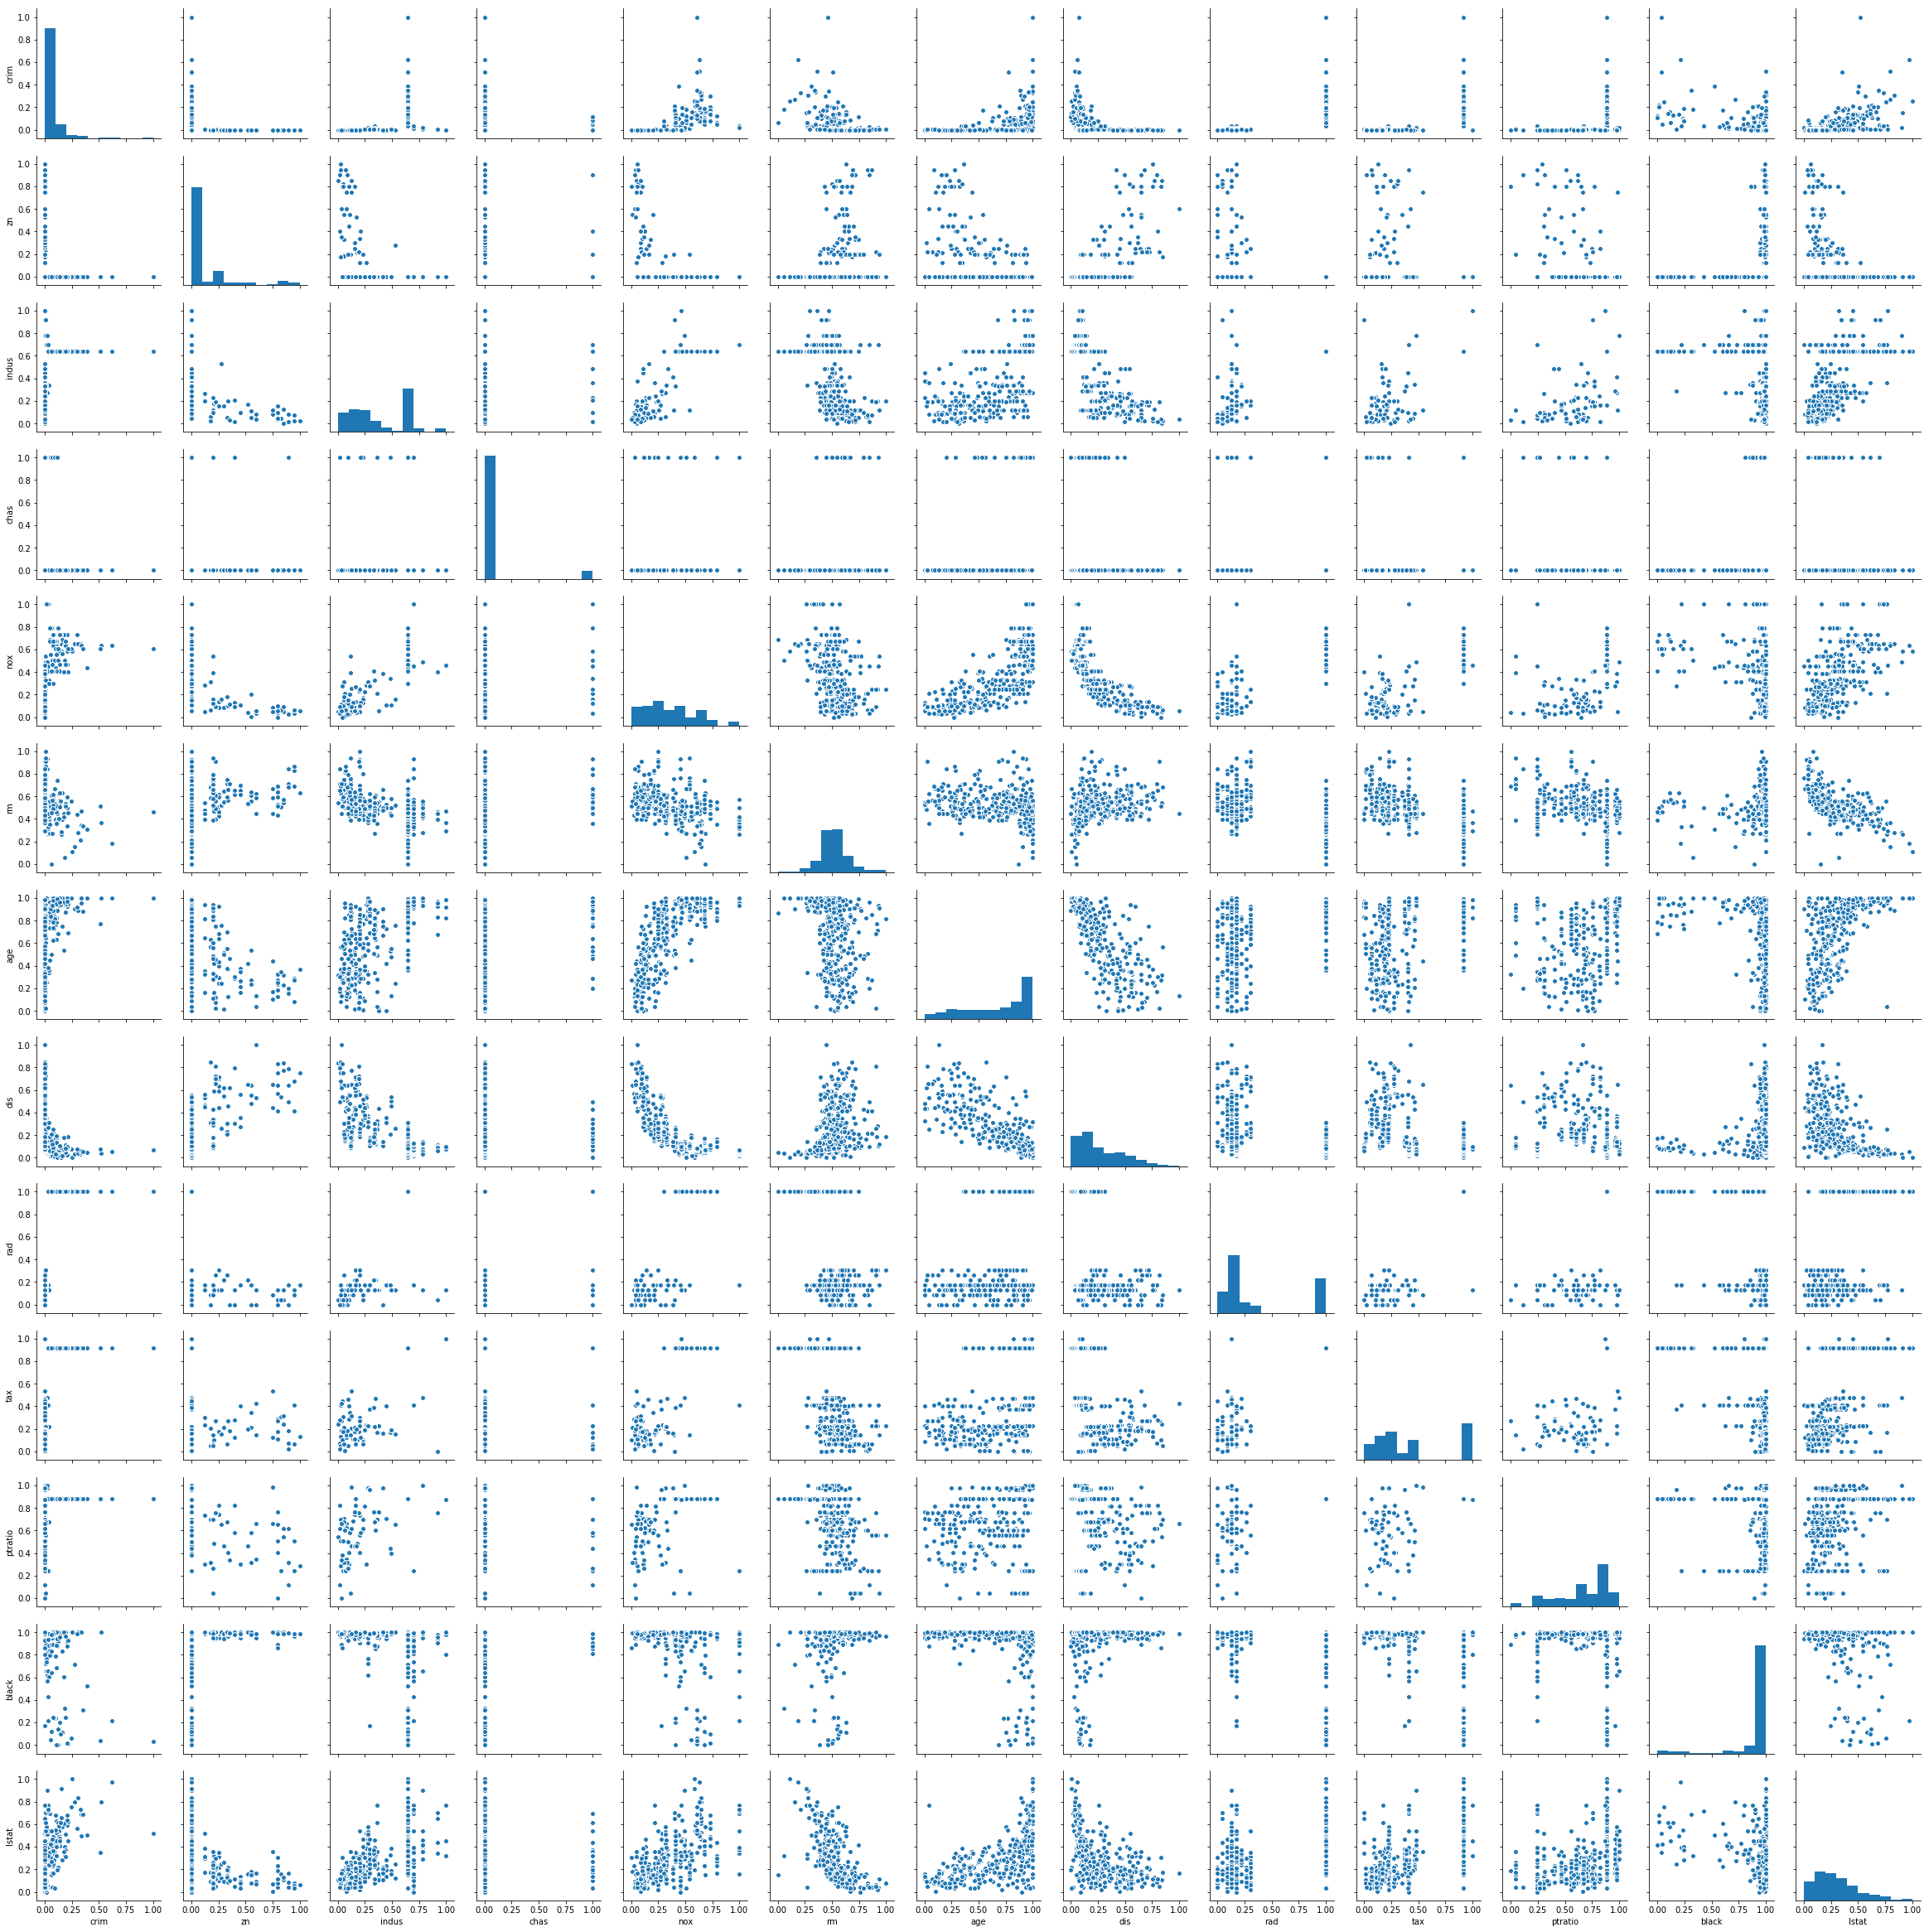

In [20]:
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(X)
plt.show()


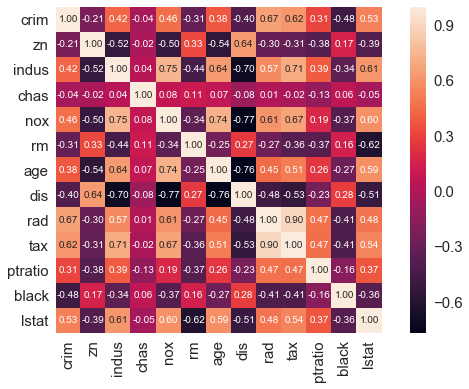

In [21]:
# correlation analysis
colnames = list(X.columns.values)
X_cm = np.corrcoef(X[colnames].values.T)
sns.set(font_scale=1.5)

plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                         annot_kws={'size':10},yticklabels=colnames,xticklabels=colnames)
plt.show()

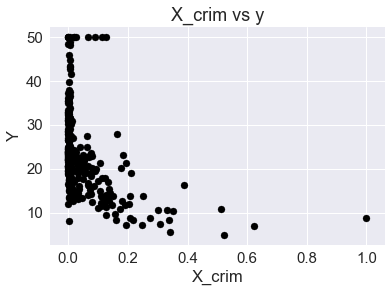

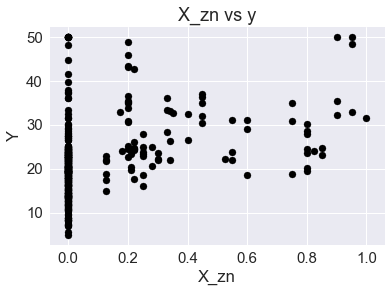

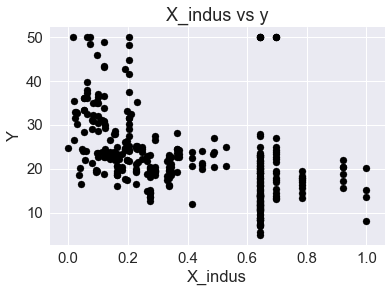

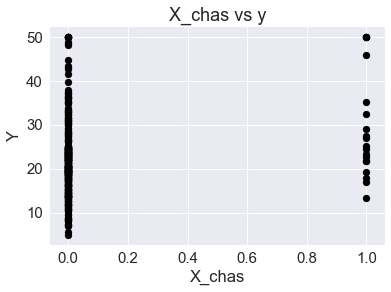

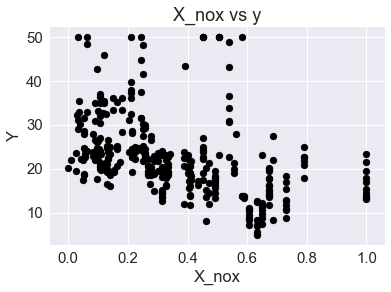

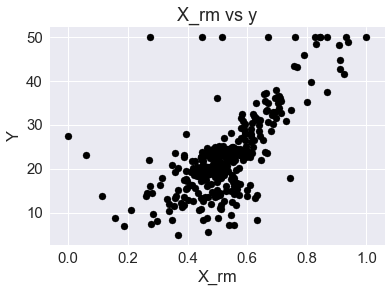

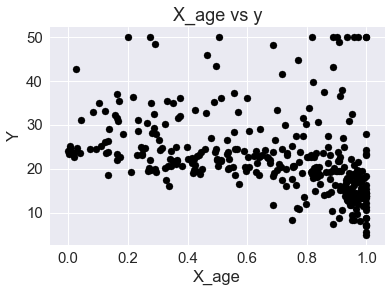

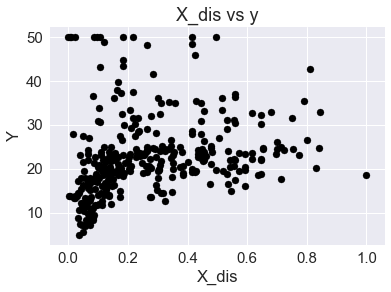

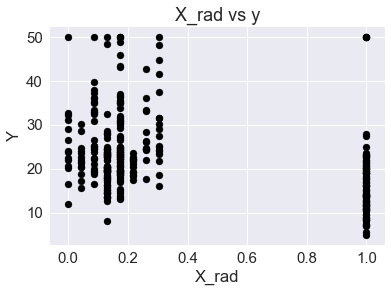

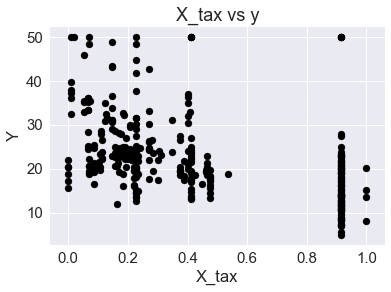

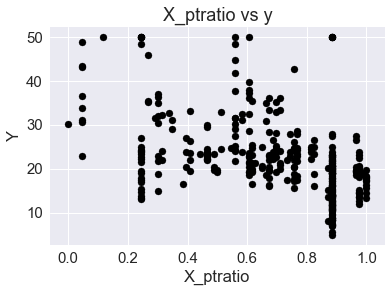

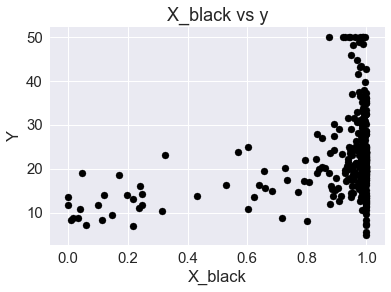

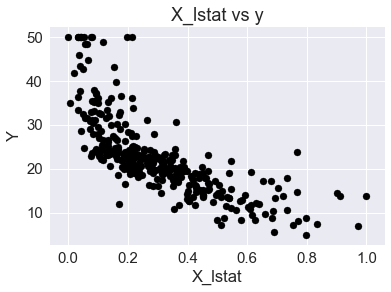

In [22]:
# each X vs Y
for i in range(0,len(colnames)):
    plt.scatter(X.iloc[:,i], y,  color='black')
    plt.title('X_{} vs y'.format(colnames[i]))
    plt.xlabel('X_{}'.format(colnames[i]))
    plt.ylabel('Y')
    plt.show()

In [23]:
############# 학습모델 구축을 위한 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(233, 13) (100, 13) (233,) (100,)


In [24]:
############# 학습모델 구축
lm = sm.OLS(y_train, X_train)

In [25]:
############# 모델 학습
lm_trained = lm.fit()

In [26]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     340.8
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          9.27e-138
Time:                        07:56:20   Log-Likelihood:                -723.97
No. Observations:                 233   AIC:                             1474.
Df Residuals:                     220   BIC:                             1519.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim           4.4554      6.920      0.644      0.520      -9.183      18.094
zn             5.6568      2.371      2.386      0.018       0.985      10.329
indus          5.6789      2.783      2.041      0.042       0.194      11.163
chas           3.8509      1.501      2.566      0.011       0.893       6.809
nox           -1.7428      3.111     -0.560      0.576      -7.873       4.388
rm            34.2899      2.893     11.854      0.000      28.589      39.991
age            1.8290      2.173      0.842      0.401      -2.453       6.111
dis           -4.2485      3.075     -1.382      0.168     -10.308       1.811
rad            5.6509      2.692      2.100      0.037       0.346      10.955
tax           -7.5637      3.345     -2.261      0.025     -14.157      -0.971
ptratio       -3.2381      1.852     -1.748      0.082      -6.888       0.412
black         10.9737      1.694      6.479      0.000       7.636      14.312
lstat        -15.3362      3.058     -5.015      0.000     -21.363      -9.309
==============================================================================
Omnibus:                      107.165   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.563
Skew:                           1.752   Prob(JB):                    5.77e-129
Kurtosis:                       9.968   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

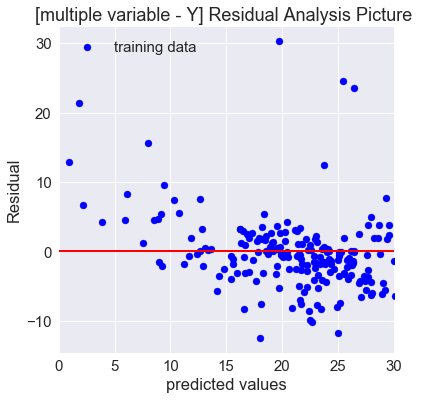

In [27]:
############# 모델 평가
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


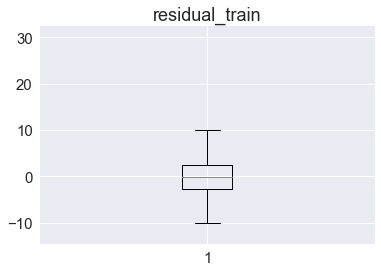

In [28]:
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

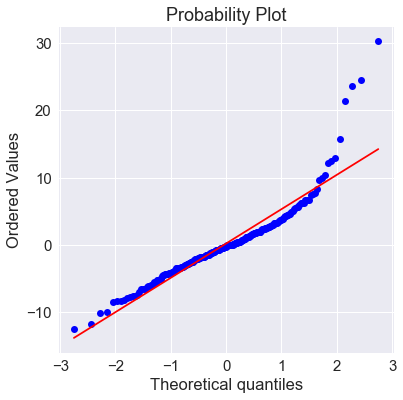

In [29]:
# Check the Model Assumption: normal distribution
plt.figure(figsize=(6,6))
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()

In [30]:
############# 예측성능평가
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
y_pred_train

30     16.223540
231    29.042226
55     27.398120
146    16.995117
245    25.460911
270     5.919535
175    36.494972
120    21.473237
182    25.335201
31     20.567888
14     18.947093
191    25.908483
33     22.486896
310    24.230964
141    42.336788
26     21.657912
172    25.156712
60     22.891470
330    23.007363
211    17.881051
67     25.581866
88     23.261752
142    43.843814
225    21.219499
22     30.375961
41     26.352648
165    23.682807
323     3.849577
328    16.350963
179    21.806882
         ...    
277    11.267120
36     26.395027
325    18.443471
308    19.604923
185    35.643606
311    15.648360
103    16.535710
235    28.028140
268    -3.401893
20     13.346972
291    21.675485
284    18.129058
233    18.572116
125    30.998371
96      6.104603
168    21.195373
250    24.986458
114    18.439251
174    33.392358
287    23.171840
178    34.177853
123    25.801573
239    18.595936
28     18.190350
305     9.414280
35     34.651665
156    31.690562
68     26.4997

In [31]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
y_pred_test

58     26.679608
166    25.645670
102    23.034495
76     23.078581
183    27.826353
273     6.970730
266    12.751093
163    30.636010
265    19.386169
89     23.716948
101    15.913118
94     16.852789
271    12.736586
221    23.235522
147    24.273258
40     19.979432
46     15.728859
254     8.537786
299    21.281725
5      20.979318
118    17.968274
302    26.462076
136    30.360147
219    18.503911
38     23.035242
109    38.051092
274     6.859822
289    11.179116
6      21.521272
32     23.567907
         ...    
44     22.509574
228    28.288851
3      29.760201
54     28.249253
149    25.726355
280    15.412611
241    12.777719
307    19.199839
130    36.522068
49     22.536084
122    21.545961
190    32.378533
251    15.416563
52     22.087939
194    33.614401
117    22.267354
4      21.836907
151    32.589847
128    32.892559
53     21.679085
137    29.041457
279    17.361402
107    28.186550
45     19.402771
297    19.152978
181    37.169726
143    20.543396
332    22.9010

In [32]:
# performance measure: MSE, MAE, MAPE, Rsquared

In [33]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 29.27, mse_test: 25.18


In [34]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 3.62, mae_test: 3.64


In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))



mape_train: 18.87, mape_test: 20.45


In [37]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.66, r2_test: 0.68


In [38]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train)
print(residual_test)


30     -3.176460
231     4.542226
55      3.498120
146    -2.304883
245   -24.539089
270    -4.480465
175    -6.605028
120    -1.126763
182     0.135201
31      0.867888
14     -0.652907
191     3.908483
33     -0.913104
310     1.030964
141    -6.163212
26      0.457912
172     0.356712
60      0.691470
330     2.407363
211     0.081051
67     -1.918134
88      5.261752
142    -6.156186
225     2.519499
22     -0.424039
41      1.352648
165     1.482807
323    -4.250423
328    -1.149037
179    -0.993118
         ...    
277     1.767120
36      1.695027
325    -1.656529
308    -0.495077
185     3.243606
311     1.848360
103    -2.864290
235     6.328140
268   -10.401893
20     -0.153028
291     7.575485
284     7.629058
233    -0.027884
125    -6.201629
96     -8.295397
168    -3.104627
250    11.686458
114    -5.360749
174    -0.407642
287     7.771840
178    -2.322147
123     1.201573
239    -2.204064
28     -1.809650
305    -9.585720
35     -0.748335
156     0.090562
68     -0.0002

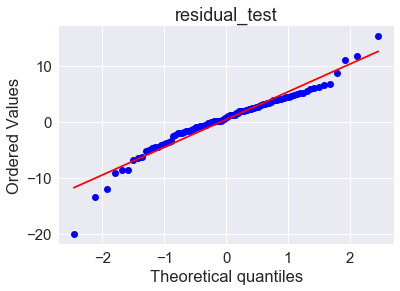

In [39]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

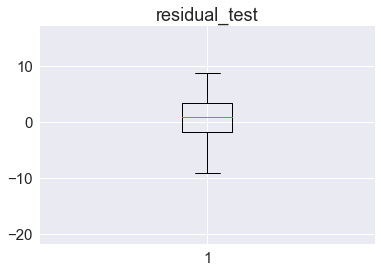

In [40]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

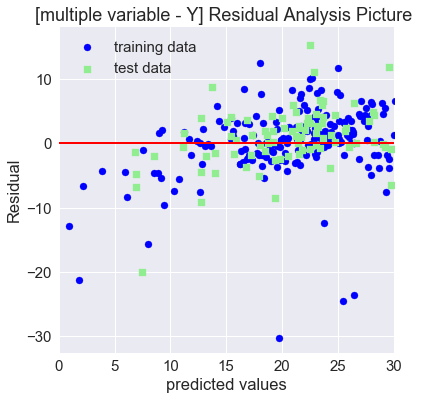

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


In [42]:
################## Multiple Linear Regression with Logarithm
y_train_log = pd.DataFrame(np.log(y_train))
#y_test_log = pd.DataFrame(np.log(y_test))

In [43]:
lm_log = sm.OLS(y_train_log, X_train)
lm_log_trained = lm_log.fit()
lm_log_trained.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1275.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          5.06e-199
Time:                        07:56:35   Log-Likelihood:                -88.178
No. Observations:                 233   AIC:                             202.4
Df Residuals:                     220   BIC:                             247.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim           0.2050      0.452      0.454      0.651      -0.686       1.096
zn             0.1879      0.155      1.214      0.226      -0.117       0.493
indus          0.6036      0.182      3.321      0.001       0.245       0.962
chas           0.0801      0.098      0.818      0.415      -0.113       0.273
nox            0.5054      0.203      2.488      0.014       0.105       0.906
rm             2.3794      0.189     12.596      0.000       2.007       2.752
age            0.2301      0.142      1.622      0.106      -0.050       0.510
dis            0.8381      0.201      4.174      0.000       0.442       1.234
rad            0.1129      0.176      0.642      0.521      -0.234       0.459
tax           -0.4033      0.218     -1.846      0.066      -0.834       0.027
ptratio        0.1932      0.121      1.597      0.112      -0.045       0.432
black          1.1552      0.111     10.445      0.000       0.937       1.373
lstat         -0.3152      0.200     -1.578      0.116      -0.709       0.078
==============================================================================
Omnibus:                       47.491   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.712
Skew:                           0.758   Prob(JB):                     2.11e-40
Kurtosis:                       7.065   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
################## Multiple Linear Regression without Logarithm
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     340.8
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          9.27e-138
Time:                        07:56:35   Log-Likelihood:                -723.97
No. Observations:                 233   AIC:                             1474.
Df Residuals:                     220   BIC:                             1519.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim           4.4554      6.920      0.644      0.520      -9.183      18.094
zn             5.6568      2.371      2.386      0.018       0.985      10.329
indus          5.6789      2.783      2.041      0.042       0.194      11.163
chas           3.8509      1.501      2.566      0.011       0.893       6.809
nox           -1.7428      3.111     -0.560      0.576      -7.873       4.388
rm            34.2899      2.893     11.854      0.000      28.589      39.991
age            1.8290      2.173      0.842      0.401      -2.453       6.111
dis           -4.2485      3.075     -1.382      0.168     -10.308       1.811
rad            5.6509      2.692      2.100      0.037       0.346      10.955
tax           -7.5637      3.345     -2.261      0.025     -14.157      -0.971
ptratio       -3.2381      1.852     -1.748      0.082      -6.888       0.412
black         10.9737      1.694      6.479      0.000       7.636      14.312
lstat        -15.3362      3.058     -5.015      0.000     -21.363      -9.309
==============================================================================
Omnibus:                      107.165   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.563
Skew:                           1.752   Prob(JB):                    5.77e-129
Kurtosis:                       9.968   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# prediction with logarithm
y_pred_train_log = lm_log_trained.predict(X_train)
y_pred_train_log_exp = np.exp(y_pred_train_log)

y_pred_test_log = lm_log_trained.predict(X_test)
y_pred_test_log_exp = np.exp(y_pred_test_log)


In [46]:
# MSE: Mean of Squared error
mse_train_log_exp = mean_squared_error(y_train, y_pred_train_log_exp)
mse_test_log_exp = mean_squared_error(y_test, y_pred_test_log_exp)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train_log_exp,mse_test_log_exp))

mse_train: 56.25, mse_test: 47.45


In [47]:
############### Feature selection: backward elimination
# ref: https://github.com/chekoduadarsh/Backward-Elimination-in-Python
def backwardElimination(x, y):
    SL = 0.05
    elimed_Variable = []
    numVars = len(np.array(x)[0])
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(y, np.array(x)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(np.array(x), j, 1)
                                        
        else:
            elimed_Variable.append(i)
            pass
    regressor_OLS.summary()
    return elimed_Variable

In [48]:
imp_variabble = backwardElimination(X_train, y_train)
imp_variabble

[7, 8, 9, 10, 11, 12]

In [49]:
X_train.iloc[:,imp_variabble]

,dis,rad,tax,ptratio,black,lstat
30,0.517509,0.086957,0.086042,0.616279,1.000000,0.399283
231,0.753014,0.130435,0.175908,0.511628,0.984850,0.117550
55,0.445802,0.130435,0.177820,0.744186,0.996772,0.151490
146,0.264636,0.130435,0.170172,0.697674,0.995780,0.613962
245,0.004123,1.000000,0.913958,0.883721,0.921835,0.215232
270,0.054057,1.000000,0.913958,0.883721,0.314845,0.687362
175,0.105441,0.173913,0.145315,0.046512,0.978317,0.152594
120,0.164111,0.173913,0.206501,0.465116,0.990671,0.218267
182,0.344380,0.086957,0.066922,0.697674,1.000000,0.134106
31,0.593391,0.130435,0.105163,0.488372,0.996594,0.323400


In [50]:
X_train.iloc[:,imp_variabble].columns

Index(['dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], dtype='object')

In [51]:
##### Feature selection: Stepwise selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [52]:
imp_variable_stepwise = stepwise_selection(X_train, y_train)
imp_variable_stepwise

C:\Users\pc-user\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  lstat                          with p-value 9.01473e-41
Add  rm                             with p-value 2.39419e-12
Add  chas                           with p-value 0.000177166
Add  ptratio                        with p-value 0.00040898
Add  dis                            with p-value 0.00155703
Add  nox                            with p-value 0.00358747


['lstat', 'rm', 'chas', 'ptratio', 'dis', 'nox']